## Alternative Model (Preprocessing)
You need to run this before you run notebook 5b.

The wavs in your dataset will be converted to 9bit linear and 80-band mels.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math, pickle, os, glob
import numpy as np
from utils import *
from dsp import *

In [2]:
bits = 9
notebook_name = 'nb5'

In [3]:
# Point SEG_PATH to a folder containing your training wavs 
# Doesn't matter if it's LJspeech, CMU Arctic etc. it should work fine
SEG_PATH = '/where/you/keep/the/dataset/' 
DATA_PATH = f'data/{notebook_name}/'
%mkdir -p $DATA_PATH

In [4]:
def get_files(path, extension='.wav') :
    filenames = []
    for filename in glob.iglob(f'{path}/**/*{extension}', recursive=True):
        filenames += [filename]
    return filenames

In [5]:
wav_files = get_files(SEG_PATH)

In [6]:
def convert_file(path) :
    wav = load_wav(path, encode=False)
    mel = melspectrogram(wav)
    quant = (wav + 1.) * (2**bits - 1) / 2
    return mel.astype(np.float32), quant.astype(np.int)

In [33]:
m, x = convert_file(wav_files[1])

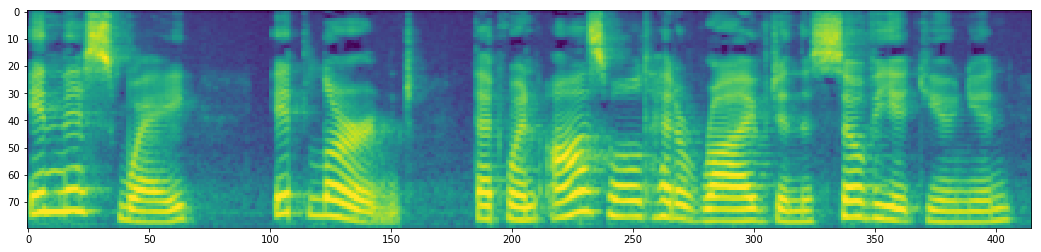

In [34]:
plot_spec(m)

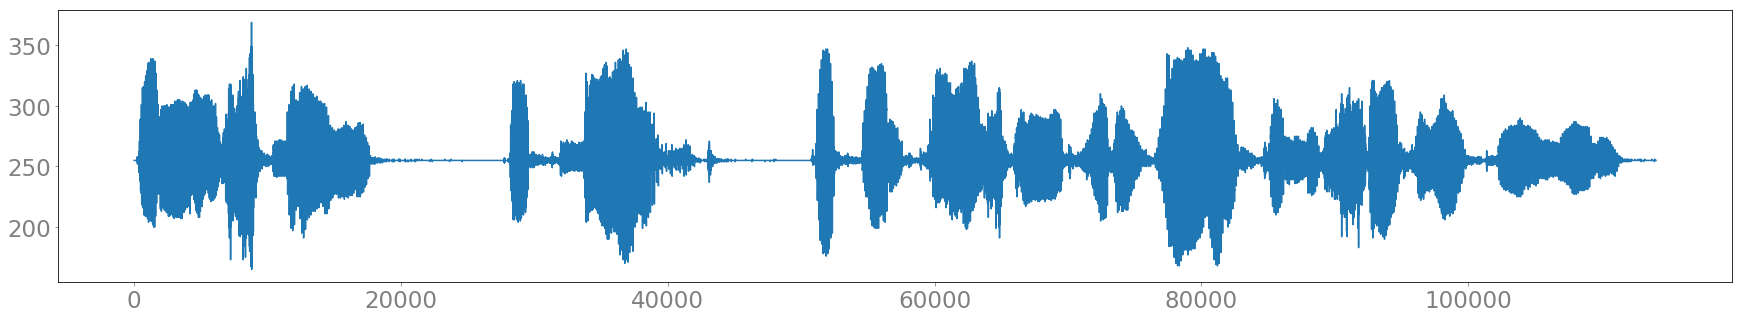

In [35]:
plot(x)

In [36]:
x = 2 * x / (2**bits - 1) - 1

In [37]:
librosa.output.write_wav(DATA_PATH + 'test_quant.wav', x, sr=sample_rate)

In [38]:
QUANT_PATH = DATA_PATH + 'quant/'
MEL_PATH = DATA_PATH + 'mel/'
%mkdir -p $QUANT_PATH
%mkdir -p $MEL_PATH

In [ ]:
wav_files[0].split('/')[-1][:-4]

In [ ]:
# This will take a while depending on size of dataset
dataset_ids = []
for i, path in enumerate(wav_files) :
    id = path.split('/')[-1][:-4]
    dataset_ids += [id]
    m, x = convert_file(path)
    np.save(f'{MEL_PATH}{id}.npy', m)
    np.save(f'{QUANT_PATH}{id}.npy', x)
    display('%i/%i', (i + 1, len(wav_files)))

In [ ]:
with open(DATA_PATH + 'dataset_ids.pkl', 'wb') as f:
    pickle.dump(dataset_ids, f)